In [1]:
import lpt as l
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
plt.rcParams['image.cmap'] = 'jet'
import intpol as z

In [20]:
GridSize = 8
RedShift = 50
XSize = 8
GridSize_cic=8

In [21]:
a = l.LPT(GridSize=GridSize, XSize = XSize,Seed = 400000)
Position = a.Position_2lpt(RedShift)
x_array = a.x_range()


In [22]:
Lbox = a.XSize
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()
print PositionX.shape

(512,)


In [23]:

intp = z.pmInterpolation()
deltaxf = intp.cic(PositionX,PositionY,PositionZ,Lbox,GridSize_cic)-1
delx=a.initial_deltax()
np.savetxt("data",np.column_stack([PositionX,PositionY,PositionZ]),header="x,y,z")

In [24]:
Lbox = a.XSize
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()
intp = z.pmInterpolation()
deltaxf = intp.cic(PositionX,PositionY,PositionZ,Lbox,GridSize_cic)-1
delx=a.initial_deltax()

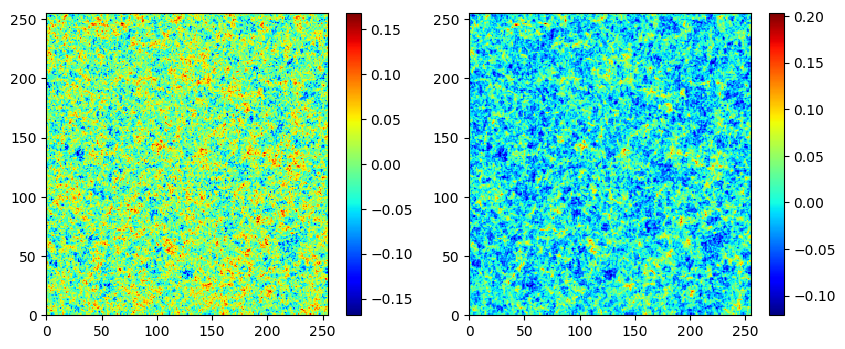

In [5]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3])
plt.colorbar()
plt.show()

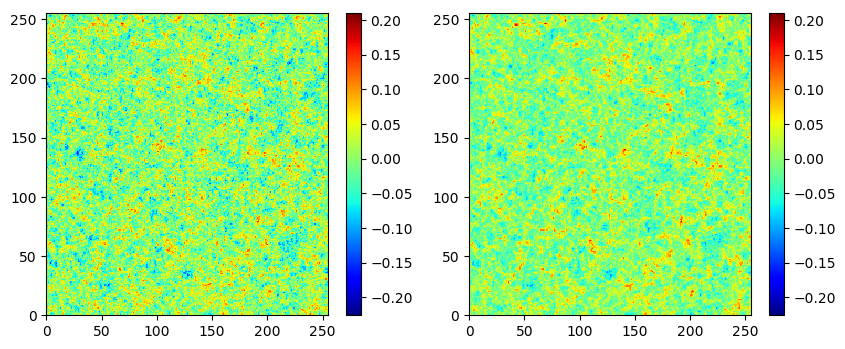

In [6]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3],vmin=np.amin(delx),vmax=np.amax(delx))
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3],vmin=np.amin(delx),vmax=np.amax(delx))
plt.colorbar()
plt.show()

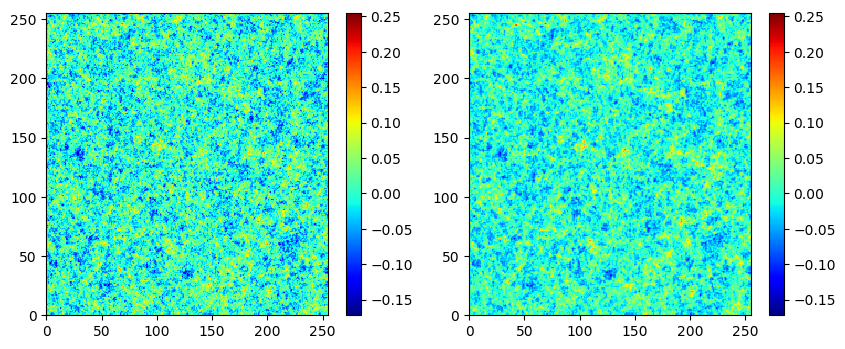

In [7]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3],vmin=np.amin(deltaxf),vmax=np.amax(deltaxf))
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3],vmin=np.amin(deltaxf),vmax=np.amax(deltaxf))
plt.colorbar()
plt.show()

5.47623021416 3.62659753076


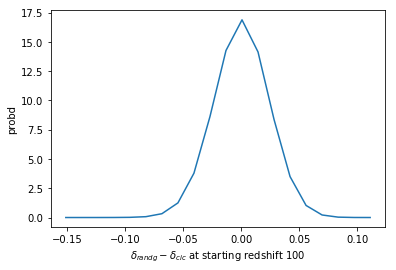

In [8]:
residue = delx - deltaxf
probd, edge = np.histogram(residue,bins = 20,density = 1)
plt.plot((edge[0:-1]+edge[1:])/2.,probd)
print np.sqrt(np.var(probd)),np.mean(probd)
plt.ylabel('probd')
plt.xlabel('$\delta_{randg}-\delta_{cic}$ at starting redshift 100')
plt.show()

## Repeating the same as above for zeldovich displacement

In [24]:
a = l.LPT(GridSize=GridSize, XSize = XSize,Seed = 400000)
Position = a.Position_zeld(RedShift)
x_array = a.x_range()

() (61231,)


In [25]:
Lbox = a.XSize
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()
intp = z.pmInterpolation()
deltaxf = intp.cic(PositionX,PositionY,PositionZ,Lbox,GridSize_cic)-1
delx=a.initial_deltax()

() (61231,)


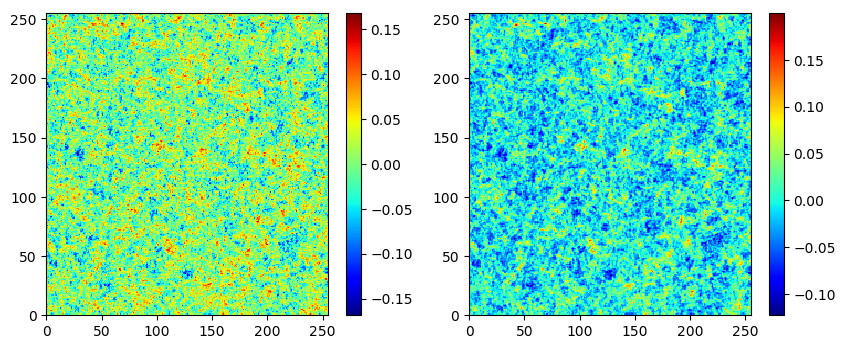

In [26]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3])
plt.colorbar()
plt.show()

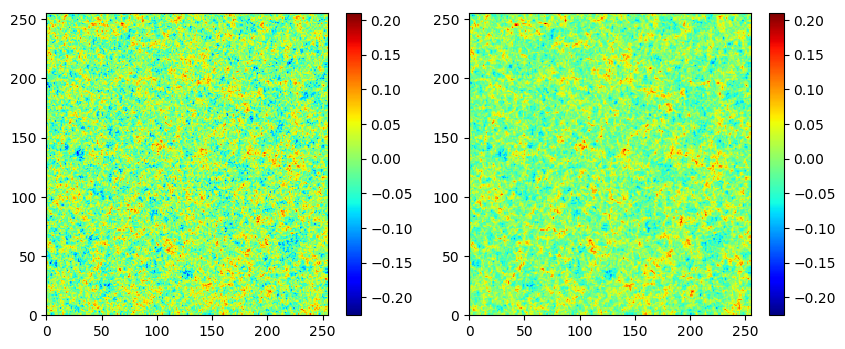

In [27]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3],vmin=np.amin(delx),vmax=np.amax(delx))
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3],vmin=np.amin(delx),vmax=np.amax(delx))
plt.colorbar()
plt.show()

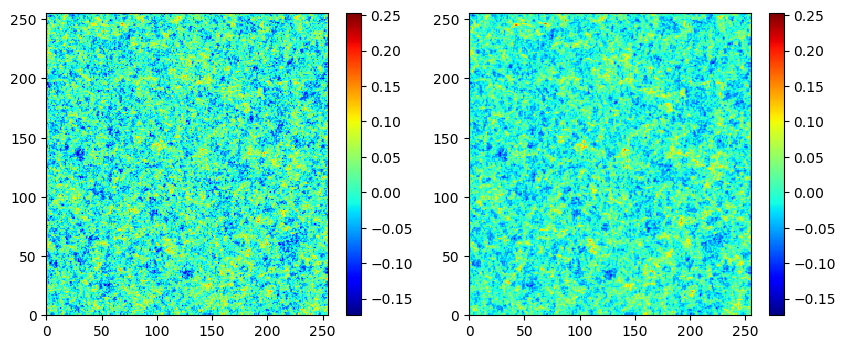

In [28]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.pcolormesh(x_array,x_array,delx[:,:,3],vmin=np.amin(deltaxf),vmax=np.amax(deltaxf))
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x_array,x_array,deltaxf[:,:,3],vmin=np.amin(deltaxf),vmax=np.amax(deltaxf))
plt.colorbar()
plt.show()

5.48120708585 3.63385329412


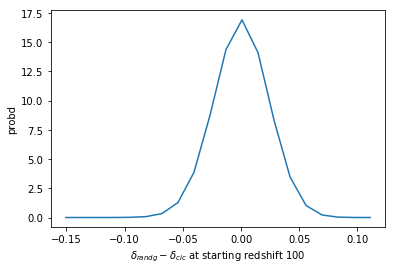

In [29]:
residue = delx - deltaxf
probd, edge = np.histogram(residue,bins = 20,density = 1)
plt.plot((edge[0:-1]+edge[1:])/2.,probd)
print np.sqrt(np.var(probd)),np.mean(probd)
plt.ylabel('probd')
plt.xlabel('$\delta_{randg}-\delta_{cic}$ at starting redshift 100')
plt.show()